# Comparação entre CNN e NN
Neste notebook, vamos comparar o desempenho de uma Rede Neural Convolucional (CNN) e uma Rede Neural (NN) simples utilizando o conjunto de dados Fashion MNIST disponível no Keras.

## Importando Bibliotecas
Vamos começar importando as bibliotecas necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical


## Carregando o Conjunto de Dados
Vamos carregar o conjunto de dados Fashion MNIST e prepará-lo para o treinamento.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizando os dados
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convertendo os rótulos para categorias
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape dos dados para a CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## Construindo a Rede Neural Convolucional (CNN)
Agora, vamos construir e compilar a CNN.

In [5]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

## Treinando a CNN
Vamos agora treinar a CNN.

In [6]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7400 - loss: 0.7391 - val_accuracy: 0.8753 - val_loss: 0.3484
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8696 - loss: 0.3785 - val_accuracy: 0.8895 - val_loss: 0.2985
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8869 - loss: 0.3192 - val_accuracy: 0.8986 - val_loss: 0.2754
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8960 - loss: 0.2907 - val_accuracy: 0.9055 - val_loss: 0.2640
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9011 - loss: 0.2755 - val_accuracy: 0.9062 - val_loss: 0.2598
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9070 - loss: 0.2586 - val_accuracy: 0.9059 - val_loss: 0.2529
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9106 - loss: 0.2386 - val_accuracy: 0.9138 - val_loss: 0.2450
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9176 - loss: 0.2236 - 

## Construindo a Rede Neural (NN)
Agora, vamos construir e compilar uma Rede Neural simples.

In [8]:
nn_model = Sequential()
nn_model.add(Flatten(input_shape=(28, 28, 1)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(10, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
nn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

## Treinando a Rede Neural (NN)
Vamos agora treinar a Rede Neural.

In [9]:
nn_history = nn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6896 - loss: 0.8845 - val_accuracy: 0.8413 - val_loss: 0.4431
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8219 - loss: 0.4946 - val_accuracy: 0.8530 - val_loss: 0.4026
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8345 - loss: 0.4558 - val_accuracy: 0.8602 - val_loss: 0.3801
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8479 - loss: 0.4283 - val_accuracy: 0.8620 - val_loss: 0.3727
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8508 - loss: 0.4087 - val_accuracy: 0.8659 - val_loss: 0.3611
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3973 - val_accuracy: 0.8710 - val_loss: 0.3592
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8579 - loss: 0.3904 - val_accuracy: 0.8735 - val_loss: 0.3536
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8648 - loss: 0.3723 - val_accuracy: 0.

## Comparando os Resultados
Vamos comparar o desempenho dos dois modelos.

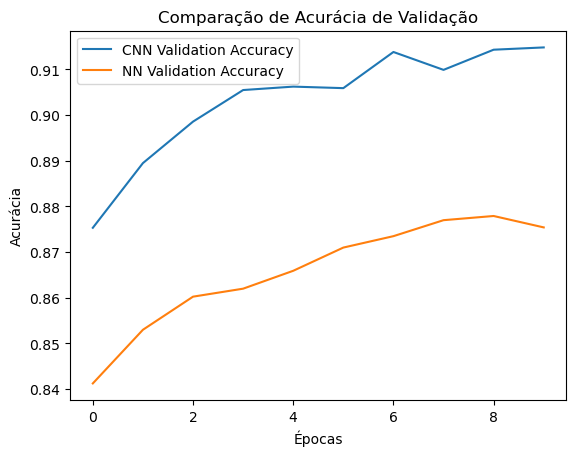

In [10]:
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(nn_history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Comparação de Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Conclusão
